In [15]:
import pandas as pd

aq_data = pd.read_json("/content/drive/MyDrive/ML/Hackathon (1)/Hackathon/AequitasData.json")
alpha_data = pd.read_json("/content/drive/MyDrive/ML/Hackathon (1)/Hackathon/AlphaData.json")
tsx_data = pd.read_json("/content/drive/MyDrive/ML/Hackathon (1)/Hackathon/TSXData.json")

total_df = pd.concat([aq_data, alpha_data, tsx_data])
total_df

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange
0,2023-01-06 09:28:00.013814157,2023-01-06 14:28:00.013814157,NBFToExchange,b8c529be-9283-11ed-ad3c-047c16291a22,NewOrderRequest,0455B,13.02,Aequitas
1,2023-01-06 09:28:00.013890960,2023-01-06 14:28:00.013890960,NBFToExchange,b8c529bf-9283-11ed-a725-047c16291a22,NewOrderRequest,0455B,13.14,Aequitas
2,2023-01-06 09:28:00.014031152,2023-01-06 14:28:00.014031152,NBFToExchange,b8c529c0-9283-11ed-bf41-047c16291a22,CancelRequest,0455B,NaN,Aequitas
3,2023-01-06 09:28:00.014086398,2023-01-06 14:28:00.014086398,NBFToExchange,b8c529c1-9283-11ed-8407-047c16291a22,CancelRequest,0455B,NaN,Aequitas
4,2023-01-06 09:28:00.014213645,2023-01-06 14:28:00.014213645,ExchangeToNBF,b8c529be-9283-11ed-ad3c-047c16291a22,NewOrderAcknowledged,0455B,13.02,Aequitas
...,...,...,...,...,...,...,...,...
212217,2023-01-06 09:31:59.995169747,2023-01-06 14:31:59.995169747,NBFToExchange,b9921f99-9283-11ed-a400-047c16291a22,NewOrderRequest,DC0OC,45.67,TSX
212218,2023-01-06 09:31:59.995210138,2023-01-06 14:31:59.995210138,NBFToExchange,b9921f83-9283-11ed-bcf1-047c16291a22,CancelRequest,DC0OC,NaN,TSX
212219,2023-01-06 09:31:59.995219075,2023-01-06 14:31:59.995219075,ExchangeToNBF,b9921f99-9283-11ed-a400-047c16291a22,NewOrderAcknowledged,DC0OC,45.67,TSX
212220,2023-01-06 09:31:59.995257550,2023-01-06 14:31:59.995257550,ExchangeToNBF,b9921f83-9283-11ed-bcf1-047c16291a22,CancelAcknowledged,DC0OC,NaN,TSX


In [109]:
new_time_epoch = []
for i in range(len(total_df)):
  new_time_epoch.append(total_df.iloc[i]["TimeStampEpoch"].timestamp())

print(new_time_epoch)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
total_df.columns

Index(['TimeStamp', 'TimeStampEpoch', 'Direction', 'OrderID', 'MessageType',
       'Symbol', 'OrderPrice', 'Exchange'],
      dtype='object')

In [18]:
total_df.isnull().sum()

TimeStamp              0
TimeStampEpoch         0
Direction              0
OrderID                0
MessageType            0
Symbol                 0
OrderPrice        133610
Exchange               0
dtype: int64

In [74]:
total_df.groupby(["OrderID"]).count()

,TimeStamp,TimeStampEpoch,Direction,MessageType,Symbol,OrderPrice,Exchange
OrderID,,,,,,,
b8bd3bba-9283-11ed-a702-047c16291a22,5,5,5,5,5,2,5
b8bd3bbb-9283-11ed-b530-047c16291a22,5,5,5,5,5,2,5
b8bd3bbc-9283-11ed-ac5e-047c16291a22,5,5,5,5,5,2,5
b8bd3bbd-9283-11ed-a55f-047c16291a22,5,5,5,5,5,2,5
b8bd3bbe-9283-11ed-84c7-047c16291a22,5,5,5,5,5,2,5
...,...,...,...,...,...,...,...
b9921f95-9283-11ed-a89c-047c16291a22,2,2,2,2,2,2,2
b9921f96-9283-11ed-a3af-047c16291a22,2,2,2,2,2,2,2
b9921f97-9283-11ed-9d78-047c16291a22,2,2,2,2,2,2,2


##saving as txt

In [58]:
with open("/content/drive/MyDrive/ML/data.txt", 'a') as f:
    dfAsString = total_df.to_string(header=False, index=False)
    f.write(dfAsString)

In [73]:
types = total_df.groupby(['MessageType']).count()
types
# types["MessageType"]

,TimeStamp,TimeStampEpoch,Direction,OrderID,Symbol,OrderPrice,Exchange
MessageType,,,,,,,
CancelAcknowledged,41942,41942,41942,41942,41942,0,41942
CancelRequest,45821,45821,45821,45821,45821,0,45821
Cancelled,45847,45847,45847,45847,45847,0,45847
NewOrderAcknowledged,45899,45899,45899,45899,45899,45899,45899
NewOrderRequest,45900,45900,45900,45900,45900,45900,45900
Rejected,1,1,1,1,1,1,1
Trade,2572,2572,2572,2572,2572,2572,2572


In [40]:
total_df.groupby(["Direction"]).count()

,TimeStamp,TimeStampEpoch,OrderID,MessageType,Symbol,OrderPrice,Exchange
Direction,,,,,,,
ExchangeToNBF,136261,136261,136261,136261,136261,48472,136261
NBFToExchange,91721,91721,91721,91721,91721,45900,91721


In [43]:
trade = total_df.loc[total_df["MessageType"]=="Trade"]
trade.groupby(["Direction"]).count()

,TimeStamp,TimeStampEpoch,OrderID,MessageType,Symbol,OrderPrice,Exchange
Direction,,,,,,,
ExchangeToNBF,2572,2572,2572,2572,2572,2572,2572


In [45]:
trade

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange
2433,2023-01-06 09:30:00.237001058,2023-01-06 14:30:00.237001058,ExchangeToNBF,b8c5c549-9283-11ed-8465-047c16291a22,Trade,NH4B9,31.74,Aequitas
2829,2023-01-06 09:30:00.979712397,2023-01-06 14:30:00.979712397,ExchangeToNBF,b8c5ed25-9283-11ed-b147-047c16291a22,Trade,WXXDD,0.65,Aequitas
3875,2023-01-06 09:30:05.042426870,2023-01-06 14:30:05.042426870,ExchangeToNBF,b8c6145c-9283-11ed-a73d-047c16291a22,Trade,I6SP5,21.14,Aequitas
3876,2023-01-06 09:30:05.042436748,2023-01-06 14:30:05.042436748,ExchangeToNBF,b8c6145c-9283-11ed-a73d-047c16291a22,Trade,I6SP5,21.14,Aequitas
3892,2023-01-06 09:30:05.057509879,2023-01-06 14:30:05.057509879,ExchangeToNBF,b8c61460-9283-11ed-bd6c-047c16291a22,Trade,I6SP5,12.54,Aequitas
...,...,...,...,...,...,...,...,...
204775,2023-01-06 09:31:52.959948614,2023-01-06 14:31:52.959948614,ExchangeToNBF,b990e6af-9283-11ed-8242-047c16291a22,Trade,PN2Y3,0.64,TSX
204910,2023-01-06 09:31:52.996532333,2023-01-06 14:31:52.996532333,ExchangeToNBF,b990e6ca-9283-11ed-96df-047c16291a22,Trade,7FXH3,1.04,TSX
205072,2023-01-06 09:31:53.125484066,2023-01-06 14:31:53.125484066,ExchangeToNBF,b990e6ea-9283-11ed-8227-047c16291a22,Trade,P9R4S,0.01,TSX
206727,2023-01-06 09:31:55.169137434,2023-01-06 14:31:55.169137434,ExchangeToNBF,b991350b-9283-11ed-8f95-047c16291a22,Trade,OCCXW,2.41,TSX


In [67]:
total_df.groupby(["Symbol"]).count()

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,OrderPrice,Exchange
Symbol,,,,,,,
0455B,1228,1228,1228,1228,1228,614,1228
04NT5,53,53,53,53,53,53,53
05VGI,2315,2315,2315,2315,2315,926,2315
07FM5,466,466,466,466,466,190,466
07P3R,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...
ZQ5NU,16,16,16,16,16,16,16
ZT7MV,13,13,13,13,13,13,13
ZVLDO,312,312,312,312,312,156,312


In [68]:
id_count = total_df.groupby(["OrderID"]).count()
# id_count.columns
id_count["OrderPrice"]

OrderID
b8bd3bba-9283-11ed-a702-047c16291a22    2
b8bd3bbb-9283-11ed-b530-047c16291a22    2
b8bd3bbc-9283-11ed-ac5e-047c16291a22    2
b8bd3bbd-9283-11ed-a55f-047c16291a22    2
b8bd3bbe-9283-11ed-84c7-047c16291a22    2
                                       ..
b9921f95-9283-11ed-a89c-047c16291a22    2
b9921f96-9283-11ed-a3af-047c16291a22    2
b9921f97-9283-11ed-9d78-047c16291a22    2
b9921f98-9283-11ed-842b-047c16291a22    2
b9921f99-9283-11ed-a400-047c16291a22    2
Name: OrderPrice, Length: 48747, dtype: int64

In [48]:
trade.groupby(["OrderID"]).count()

,TimeStamp,TimeStampEpoch,Direction,MessageType,Symbol,OrderPrice,Exchange
OrderID,,,,,,,
b8c5c549-9283-11ed-8465-047c16291a22,1,1,1,1,1,1,1
b8c5ed25-9283-11ed-b147-047c16291a22,1,1,1,1,1,1,1
b8c6145c-9283-11ed-a73d-047c16291a22,2,2,2,2,2,2,2
b8c61460-9283-11ed-bd6c-047c16291a22,3,3,3,3,3,3,3
b8c61464-9283-11ed-a7a8-047c16291a22,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
b990e6af-9283-11ed-8242-047c16291a22,1,1,1,1,1,1,1
b990e6ca-9283-11ed-96df-047c16291a22,1,1,1,1,1,1,1
b990e6ea-9283-11ed-8227-047c16291a22,1,1,1,1,1,1,1


In [55]:
trade_ids = trade.groupby(["OrderID"]).count()


pandas.core.frame.DataFrame

In [75]:
rejected = total_df.loc[total_df["MessageType"]=="Rejected"]
rejected

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange
2390,2023-01-06 09:30:00.124958790,2023-01-06 14:30:00.124958790,ExchangeToNBF,b8c5c53e-9283-11ed-97a3-047c16291a22,Rejected,I6SP5,3.29,Aequitas


In [54]:
sample_trade_id = total_df.loc[total_df["OrderID"]=="b8bd3bba-9283-11ed-a702-047c16291a22"]
sample_trade_id

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange
0,2023-01-06 09:30:00.369765016,2023-01-06 14:30:00.369765016,NBFToExchange,b8bd3bba-9283-11ed-a702-047c16291a22,NewOrderRequest,PP847,16.14,Alpha
1,2023-01-06 09:30:00.369815365,2023-01-06 14:30:00.369815365,ExchangeToNBF,b8bd3bba-9283-11ed-a702-047c16291a22,NewOrderAcknowledged,PP847,16.14,Alpha
4,2023-01-06 09:30:00.372541345,2023-01-06 14:30:00.372541345,NBFToExchange,b8bd3bba-9283-11ed-a702-047c16291a22,CancelRequest,PP847,NaN,Alpha
6,2023-01-06 09:30:00.372589155,2023-01-06 14:30:00.372589155,ExchangeToNBF,b8bd3bba-9283-11ed-a702-047c16291a22,CancelAcknowledged,PP847,NaN,Alpha
7,2023-01-06 09:30:00.372593117,2023-01-06 14:30:00.372593117,ExchangeToNBF,b8bd3bba-9283-11ed-a702-047c16291a22,Cancelled,PP847,NaN,Alpha


In [42]:
canceled = total_df.loc[total_df["MessageType"]=="Cancelled"]
canceled.groupby(["Direction"]).count()

,TimeStamp,TimeStampEpoch,OrderID,MessageType,Symbol,OrderPrice,Exchange
Direction,,,,,,,
ExchangeToNBF,45847,45847,45847,45847,45847,0,45847


In [44]:
cancel_request = total_df.loc[total_df["MessageType"]=="CancelRequest"]
cancel_request.groupby(["Direction"]).count()

,TimeStamp,TimeStampEpoch,OrderID,MessageType,Symbol,OrderPrice,Exchange
Direction,,,,,,,
NBFToExchange,45821,45821,45821,45821,45821,0,45821


In [167]:
cancel_request = total_df.loc[total_df["MessageType"]=="CancelRequest"]
cancel_ack = total_df.loc[total_df["MessageType"]=="CancelAcknowledged"]
new_order = total_df.loc[total_df["MessageType"]=="NewOrderRequest"]
approved = total_df.loc[total_df["MessageType"]=="NewOrderAcknowledged"]
cancelled = total_df.loc[total_df["MessageType"]=="Cancelled"]

In [168]:
cancel_request.groupby(["Direction"]).count()

,TimeStamp,TimeStampEpoch,OrderID,MessageType,Symbol,OrderPrice,Exchange
Direction,,,,,,,
NBFToExchange,45821,45821,45821,45821,45821,0,45821


In [169]:
cancel_ack.groupby(["Direction"]).count()

,TimeStamp,TimeStampEpoch,OrderID,MessageType,Symbol,OrderPrice,Exchange
Direction,,,,,,,
ExchangeToNBF,41942,41942,41942,41942,41942,0,41942


In [170]:
new_order.groupby(["Direction"]).count()

,TimeStamp,TimeStampEpoch,OrderID,MessageType,Symbol,OrderPrice,Exchange
Direction,,,,,,,
NBFToExchange,45900,45900,45900,45900,45900,45900,45900


In [173]:
approved.groupby(["Direction"]).count()

,TimeStamp,TimeStampEpoch,OrderID,MessageType,Symbol,OrderPrice,Exchange
Direction,,,,,,,
ExchangeToNBF,45899,45899,45899,45899,45899,45899,45899


In [172]:
cancelled.groupby(["Direction"]).count()

,TimeStamp,TimeStampEpoch,OrderID,MessageType,Symbol,OrderPrice,Exchange
Direction,,,,,,,
ExchangeToNBF,45847,45847,45847,45847,45847,0,45847


In [174]:
trade.groupby(["Direction"]).count()

,TimeStamp,TimeStampEpoch,OrderID,MessageType,Symbol,OrderPrice,Exchange
Direction,,,,,,,
ExchangeToNBF,2572,2572,2572,2572,2572,2572,2572


In [35]:
len(total_df), len(cancel_request)+len(cancel_ack)+len(new_order)+len(approved)

(227982, 179562)

##finding anamolies

###Anomaly 1

In [87]:
ids = total_df["OrderID"].drop_duplicates()

anomaly_1_ids = []
anomaly_1_pd = []

for i in range(len(ids)):
  id = ids.iloc[i]
  message_list = total_df[total_df["OrderID"]==id]
  if len(message_list[message_list["MessageType"]=="NewOrderRequest"])==0:
    print(message_list)
    anomaly_1_ids.append(id)
    anomaly_1_pd.append(message_list)

anomaly_1_ids

Streaming output truncated to the last 5000 lines.
                          TimeStamp                TimeStampEpoch  \
56796 2023-01-06 09:30:00.541170406 2023-01-06 14:30:00.541170406   

           Direction                               OrderID MessageType Symbol  \
56796  ExchangeToNBF  b96fca59-9283-11ed-8db7-047c16291a22       Trade  P29R0   

       OrderPrice Exchange  
56796        0.07      TSX  
                          TimeStamp                TimeStampEpoch  \
56797 2023-01-06 09:30:00.541177234 2023-01-06 14:30:00.541177234   

           Direction                               OrderID MessageType Symbol  \
56797  ExchangeToNBF  b96fca5a-9283-11ed-8841-047c16291a22       Trade  P29R0   

       OrderPrice Exchange  
56797        0.75      TSX  
                          TimeStamp                TimeStampEpoch  \
56798 2023-01-06 09:30:00.541184588 2023-01-06 14:30:00.541184588   

           Direction                               OrderID MessageType Symbol  \
56798  Ex

['b8c529c0-9283-11ed-bf41-047c16291a22',
 'b8c529c1-9283-11ed-8407-047c16291a22',
 'b8c529c2-9283-11ed-9a22-047c16291a22',
 'b8c529c4-9283-11ed-9183-047c16291a22',
 'b8c529cb-9283-11ed-8389-047c16291a22',
 'b8c529cc-9283-11ed-8a27-047c16291a22',
 'b8c529cd-9283-11ed-a467-047c16291a22',
 'b8c529cf-9283-11ed-9525-047c16291a22',
 'b8c529d4-9283-11ed-863e-047c16291a22',
 'b8c529d5-9283-11ed-94dd-047c16291a22',
 'b8c529d6-9283-11ed-bfbe-047c16291a22',
 'b8c529d7-9283-11ed-9383-047c16291a22',
 'b8c529da-9283-11ed-99a0-047c16291a22',
 'b8c550d2-9283-11ed-9169-047c16291a22',
 'b8c550d3-9283-11ed-a2ca-047c16291a22',
 'b8c550d4-9283-11ed-93ed-047c16291a22',
 'b8c550d7-9283-11ed-baf0-047c16291a22',
 'b8c550d8-9283-11ed-9a91-047c16291a22',
 'b8c550de-9283-11ed-87fd-047c16291a22',
 'b8c550e0-9283-11ed-9f93-047c16291a22',
 'b8c550e5-9283-11ed-9665-047c16291a22',
 'b8c550fa-9283-11ed-96ee-047c16291a22',
 'b8c550fb-9283-11ed-8e18-047c16291a22',
 'b8c5510e-9283-11ed-91f4-047c16291a22',
 'b8c577e7-9283-

In [102]:
print(len(anomaly_1_ids))

2847


In [106]:
total_df[total_df["OrderID"]=="b96dce03-9283-11ed-9fa6-047c16291a22"]

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange
51586,2023-01-06 09:30:00.060956323,2023-01-06 14:30:00.060956323,ExchangeToNBF,b96dce03-9283-11ed-9fa6-047c16291a22,Trade,XX9FC,0.07,TSX


In [160]:
anomaly_1_pd = pd.concat(anomaly_1_pd)

In [161]:
anomaly_1_pd

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange
2,2023-01-06 09:28:00.014031152,2023-01-06 14:28:00.014031152,NBFToExchange,b8c529c0-9283-11ed-bf41-047c16291a22,CancelRequest,0455B,NaN,Aequitas
6,2023-01-06 09:28:00.014394892,2023-01-06 14:28:00.014394892,ExchangeToNBF,b8c529c0-9283-11ed-bf41-047c16291a22,Cancelled,0455B,NaN,Aequitas
3,2023-01-06 09:28:00.014086398,2023-01-06 14:28:00.014086398,NBFToExchange,b8c529c1-9283-11ed-8407-047c16291a22,CancelRequest,0455B,NaN,Aequitas
7,2023-01-06 09:28:00.014450575,2023-01-06 14:28:00.014450575,ExchangeToNBF,b8c529c1-9283-11ed-8407-047c16291a22,Cancelled,0455B,NaN,Aequitas
8,2023-01-06 09:28:00.023758872,2023-01-06 14:28:00.023758872,NBFToExchange,b8c529c2-9283-11ed-9a22-047c16291a22,CancelRequest,OFQG6,NaN,Aequitas
...,...,...,...,...,...,...,...,...
15605,2023-01-06 09:31:59.981479413,2023-01-06 14:31:59.981479413,ExchangeToNBF,b8c79a45-9283-11ed-8526-047c16291a22,Cancelled,TKNV7,NaN,Aequitas
15515,2023-01-06 09:31:59.261560675,2023-01-06 14:31:59.261560675,NBFToExchange,b8c85d07-9283-11ed-a6e5-047c16291a22,NewOrderRequest,NH4B9,47.17,Aequitas
15517,2023-01-06 09:31:59.261999984,2023-01-06 14:31:59.261999984,ExchangeToNBF,b8c85d07-9283-11ed-a6e5-047c16291a22,NewOrderAcknowledged,NH4B9,47.17,Aequitas
15607,2023-01-06 09:31:59.988733108,2023-01-06 14:31:59.988733108,NBFToExchange,b8c85d07-9283-11ed-a6e5-047c16291a22,CancelRequest,NH4B9,NaN,Aequitas


In [162]:
anomaly_column = []
for i in range(len(anomaly_1_pd)):
  anomaly_column.append("A1")

anomaly_1_pd["Anomaly"] = anomaly_column
anomaly_1_pd

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange,Anomaly
2,2023-01-06 09:28:00.014031152,2023-01-06 14:28:00.014031152,NBFToExchange,b8c529c0-9283-11ed-bf41-047c16291a22,CancelRequest,0455B,NaN,Aequitas,A1
6,2023-01-06 09:28:00.014394892,2023-01-06 14:28:00.014394892,ExchangeToNBF,b8c529c0-9283-11ed-bf41-047c16291a22,Cancelled,0455B,NaN,Aequitas,A1
3,2023-01-06 09:28:00.014086398,2023-01-06 14:28:00.014086398,NBFToExchange,b8c529c1-9283-11ed-8407-047c16291a22,CancelRequest,0455B,NaN,Aequitas,A1
7,2023-01-06 09:28:00.014450575,2023-01-06 14:28:00.014450575,ExchangeToNBF,b8c529c1-9283-11ed-8407-047c16291a22,Cancelled,0455B,NaN,Aequitas,A1
8,2023-01-06 09:28:00.023758872,2023-01-06 14:28:00.023758872,NBFToExchange,b8c529c2-9283-11ed-9a22-047c16291a22,CancelRequest,OFQG6,NaN,Aequitas,A1
...,...,...,...,...,...,...,...,...,...
15605,2023-01-06 09:31:59.981479413,2023-01-06 14:31:59.981479413,ExchangeToNBF,b8c79a45-9283-11ed-8526-047c16291a22,Cancelled,TKNV7,NaN,Aequitas,A1
15515,2023-01-06 09:31:59.261560675,2023-01-06 14:31:59.261560675,NBFToExchange,b8c85d07-9283-11ed-a6e5-047c16291a22,NewOrderRequest,NH4B9,47.17,Aequitas,A1
15517,2023-01-06 09:31:59.261999984,2023-01-06 14:31:59.261999984,ExchangeToNBF,b8c85d07-9283-11ed-a6e5-047c16291a22,NewOrderAcknowledged,NH4B9,47.17,Aequitas,A1
15607,2023-01-06 09:31:59.988733108,2023-01-06 14:31:59.988733108,NBFToExchange,b8c85d07-9283-11ed-a6e5-047c16291a22,CancelRequest,NH4B9,NaN,Aequitas,A1


In [163]:
with open("/content/drive/MyDrive/ML/anomaly_1.txt", 'a') as f:
    dfAsString = total_df.to_string(header=False, index=False)
    f.write(dfAsString)

###Anomaly 2

In [176]:
ids = trade["OrderID"].drop_duplicates()
print(len(ids))

anomaly_2_ids = []
anomaly_2_pd = []

#cancel and trade as the same time 

for i in range(len(ids)):
  id = ids.iloc[i]
  message_list = total_df[total_df["OrderID"]==id]
  if len(message_list[message_list["MessageType"]=="CancelRequest"])>0:
    print(message_list)
    anomaly_2_ids.append(id)
    anomaly_2_pd.append(message_list)

print(anomaly_2_ids)

2550
                          TimeStamp                TimeStampEpoch  \
53287 2023-01-06 09:30:00.238813104 2023-01-06 14:30:00.238813104   
53292 2023-01-06 09:30:00.238878716 2023-01-06 14:30:00.238878716   
53293 2023-01-06 09:30:00.238891893 2023-01-06 14:30:00.238891893   
53730 2023-01-06 09:30:00.268049672 2023-01-06 14:30:00.268049672   
53734 2023-01-06 09:30:00.268169562 2023-01-06 14:30:00.268169562   
53735 2023-01-06 09:30:00.268174478 2023-01-06 14:30:00.268174478   

           Direction                               OrderID  \
53287  ExchangeToNBF  b96e916e-9283-11ed-ac0d-047c16291a22   
53292  ExchangeToNBF  b96e916e-9283-11ed-ac0d-047c16291a22   
53293  ExchangeToNBF  b96e916e-9283-11ed-ac0d-047c16291a22   
53730  NBFToExchange  b96e916e-9283-11ed-ac0d-047c16291a22   
53734  ExchangeToNBF  b96e916e-9283-11ed-ac0d-047c16291a22   
53735  ExchangeToNBF  b96e916e-9283-11ed-ac0d-047c16291a22   

              MessageType Symbol  OrderPrice Exchange  
53287               

In [177]:
anomaly_2_ids

['b96e916e-9283-11ed-ac0d-047c16291a22',
 'b96edf9a-9283-11ed-8a93-047c16291a22',
 'b9703f28-9283-11ed-b4db-047c16291a22',
 'b9717939-9283-11ed-a7ce-047c16291a22',
 'b9739a67-9283-11ed-808a-047c16291a22',
 'b9739a5c-9283-11ed-baa1-047c16291a22',
 'b9739ab8-9283-11ed-b37d-047c16291a22']

In [178]:
total_df[total_df["OrderID"]=="b96e916e-9283-11ed-ac0d-047c16291a22"]

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange
53287,2023-01-06 09:30:00.238813104,2023-01-06 14:30:00.238813104,ExchangeToNBF,b96e916e-9283-11ed-ac0d-047c16291a22,Trade,MLW24,140.14,TSX
53292,2023-01-06 09:30:00.238878716,2023-01-06 14:30:00.238878716,ExchangeToNBF,b96e916e-9283-11ed-ac0d-047c16291a22,Trade,MLW24,140.14,TSX
53293,2023-01-06 09:30:00.238891893,2023-01-06 14:30:00.238891893,ExchangeToNBF,b96e916e-9283-11ed-ac0d-047c16291a22,Trade,MLW24,140.14,TSX
53730,2023-01-06 09:30:00.268049672,2023-01-06 14:30:00.268049672,NBFToExchange,b96e916e-9283-11ed-ac0d-047c16291a22,CancelRequest,MLW24,NaN,TSX
53734,2023-01-06 09:30:00.268169562,2023-01-06 14:30:00.268169562,ExchangeToNBF,b96e916e-9283-11ed-ac0d-047c16291a22,CancelAcknowledged,MLW24,NaN,TSX
53735,2023-01-06 09:30:00.268174478,2023-01-06 14:30:00.268174478,ExchangeToNBF,b96e916e-9283-11ed-ac0d-047c16291a22,Cancelled,MLW24,NaN,TSX


In [120]:
#double check 

anomaly_2_check = trade[trade["MessageType"]=="CancelRequest"]
anomaly_2_check

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange


###Anomaly 3

In [123]:
ids = new_order["OrderID"].drop_duplicates()
print(len(ids))

anomaly_3_ids = []
anomaly_3_pd = []

#new order request but no acknowledgement 

for i in range(len(ids)):
  id = ids.iloc[i]
  message_list = total_df[total_df["OrderID"]==id]
  if len(message_list[message_list["MessageType"]=="NewOrderAcknowledged"])==0:
    print(message_list)
    anomaly_3_ids.append(id)
    anomaly_3_pd.append(message_list)

print(anomaly_3_ids)

45900
                         TimeStamp                TimeStampEpoch  \
2388 2023-01-06 09:30:00.124561040 2023-01-06 14:30:00.124561040   
2390 2023-01-06 09:30:00.124958790 2023-01-06 14:30:00.124958790   

          Direction                               OrderID      MessageType  \
2388  NBFToExchange  b8c5c53e-9283-11ed-97a3-047c16291a22  NewOrderRequest   
2390  ExchangeToNBF  b8c5c53e-9283-11ed-97a3-047c16291a22         Rejected   

     Symbol  OrderPrice  Exchange  
2388  I6SP5        3.29  Aequitas  
2390  I6SP5        3.29  Aequitas  
['b8c5c53e-9283-11ed-97a3-047c16291a22']


In [127]:
#double check 

anomaly_3_check = total_df[total_df["OrderID"]=="b8c5c53e-9283-11ed-97a3-047c16291a22"]
anomaly_3_check

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange
2388,2023-01-06 09:30:00.124561040,2023-01-06 14:30:00.124561040,NBFToExchange,b8c5c53e-9283-11ed-97a3-047c16291a22,NewOrderRequest,I6SP5,3.29,Aequitas
2390,2023-01-06 09:30:00.124958790,2023-01-06 14:30:00.124958790,ExchangeToNBF,b8c5c53e-9283-11ed-97a3-047c16291a22,Rejected,I6SP5,3.29,Aequitas


In [164]:
len(anomaly_3_ids), len(new_order)

(1, 45900)

###Anomaly 4

In [130]:
ids = cancel_request["OrderID"].drop_duplicates()


anomaly_4_ids = []
anomaly_4_pd = []

#cancel request no acknowledgment 

for i in range(len(ids)):
  id = ids.iloc[i]
  message_list = total_df[total_df["OrderID"]==id]
  if len(message_list[message_list["MessageType"]=="CancelAcknowledged"])==0:
    print(message_list)
    anomaly_4_ids.append(id)
    anomaly_1_pd.append(message_list)

print(len(anomaly_4_ids))
anomaly_4_ids

Streaming output truncated to the last 5000 lines.
14434             Cancelled  NH4B9         NaN  Aequitas  
                          TimeStamp                TimeStampEpoch  \
14360 2023-01-06 09:31:50.598519857 2023-01-06 14:31:50.598519857   
14362 2023-01-06 09:31:50.598908958 2023-01-06 14:31:50.598908958   
14436 2023-01-06 09:31:51.019566186 2023-01-06 14:31:51.019566186   
14438 2023-01-06 09:31:51.019924144 2023-01-06 14:31:51.019924144   

           Direction                               OrderID  \
14360  NBFToExchange  b8c81083-9283-11ed-aed1-047c16291a22   
14362  ExchangeToNBF  b8c81083-9283-11ed-aed1-047c16291a22   
14436  NBFToExchange  b8c81083-9283-11ed-aed1-047c16291a22   
14438  ExchangeToNBF  b8c81083-9283-11ed-aed1-047c16291a22   

                MessageType Symbol  OrderPrice  Exchange  
14360       NewOrderRequest  0455B        1.87  Aequitas  
14362  NewOrderAcknowledged  0455B        1.87  Aequitas  
14436         CancelRequest  0455B         NaN  Aequitas

['b8c529c0-9283-11ed-bf41-047c16291a22',
 'b8c529c1-9283-11ed-8407-047c16291a22',
 'b8c529c2-9283-11ed-9a22-047c16291a22',
 'b8c529c4-9283-11ed-9183-047c16291a22',
 'b8c529cb-9283-11ed-8389-047c16291a22',
 'b8c529cc-9283-11ed-8a27-047c16291a22',
 'b8c529cd-9283-11ed-a467-047c16291a22',
 'b8c529cf-9283-11ed-9525-047c16291a22',
 'b8c529d4-9283-11ed-863e-047c16291a22',
 'b8c529d5-9283-11ed-94dd-047c16291a22',
 'b8c529d6-9283-11ed-bfbe-047c16291a22',
 'b8c529d7-9283-11ed-9383-047c16291a22',
 'b8c529da-9283-11ed-99a0-047c16291a22',
 'b8c550d2-9283-11ed-9169-047c16291a22',
 'b8c550d3-9283-11ed-a2ca-047c16291a22',
 'b8c550d4-9283-11ed-93ed-047c16291a22',
 'b8c550d7-9283-11ed-baf0-047c16291a22',
 'b8c550d8-9283-11ed-9a91-047c16291a22',
 'b8c529c5-9283-11ed-abe0-047c16291a22',
 'b8c529c3-9283-11ed-a276-047c16291a22',
 'b8c550da-9283-11ed-8e4e-047c16291a22',
 'b8c550d9-9283-11ed-b3b8-047c16291a22',
 'b8c550db-9283-11ed-aff9-047c16291a22',
 'b8c550de-9283-11ed-87fd-047c16291a22',
 'b8c550e0-9283-

In [131]:
len(anomaly_4_ids)

3879

In [132]:
anomaly_4_ids

['b8c529c0-9283-11ed-bf41-047c16291a22',
 'b8c529c1-9283-11ed-8407-047c16291a22',
 'b8c529c2-9283-11ed-9a22-047c16291a22',
 'b8c529c4-9283-11ed-9183-047c16291a22',
 'b8c529cb-9283-11ed-8389-047c16291a22',
 'b8c529cc-9283-11ed-8a27-047c16291a22',
 'b8c529cd-9283-11ed-a467-047c16291a22',
 'b8c529cf-9283-11ed-9525-047c16291a22',
 'b8c529d4-9283-11ed-863e-047c16291a22',
 'b8c529d5-9283-11ed-94dd-047c16291a22',
 'b8c529d6-9283-11ed-bfbe-047c16291a22',
 'b8c529d7-9283-11ed-9383-047c16291a22',
 'b8c529da-9283-11ed-99a0-047c16291a22',
 'b8c550d2-9283-11ed-9169-047c16291a22',
 'b8c550d3-9283-11ed-a2ca-047c16291a22',
 'b8c550d4-9283-11ed-93ed-047c16291a22',
 'b8c550d7-9283-11ed-baf0-047c16291a22',
 'b8c550d8-9283-11ed-9a91-047c16291a22',
 'b8c529c5-9283-11ed-abe0-047c16291a22',
 'b8c529c3-9283-11ed-a276-047c16291a22',
 'b8c550da-9283-11ed-8e4e-047c16291a22',
 'b8c550d9-9283-11ed-b3b8-047c16291a22',
 'b8c550db-9283-11ed-aff9-047c16291a22',
 'b8c550de-9283-11ed-87fd-047c16291a22',
 'b8c550e0-9283-

In [134]:
total_df[total_df["OrderID"]=="b8c6145f-9283-11ed-8d3b-047c16291a22"]

,TimeStamp,TimeStampEpoch,Direction,OrderID,MessageType,Symbol,OrderPrice,Exchange
3885,2023-01-06 09:30:05.056330510,2023-01-06 14:30:05.056330510,NBFToExchange,b8c6145f-9283-11ed-8d3b-047c16291a22,NewOrderRequest,I6SP5,32.95,Aequitas
3886,2023-01-06 09:30:05.056728752,2023-01-06 14:30:05.056728752,ExchangeToNBF,b8c6145f-9283-11ed-8d3b-047c16291a22,NewOrderAcknowledged,I6SP5,32.95,Aequitas
3888,2023-01-06 09:30:05.057145390,2023-01-06 14:30:05.057145390,NBFToExchange,b8c6145f-9283-11ed-8d3b-047c16291a22,CancelRequest,I6SP5,NaN,Aequitas
3896,2023-01-06 09:30:05.057617732,2023-01-06 14:30:05.057617732,ExchangeToNBF,b8c6145f-9283-11ed-8d3b-047c16291a22,Cancelled,I6SP5,NaN,Aequitas


In [166]:
anomaly_4_pd

[]

###Anomaly 5

In [138]:
trade_id_count = trade.groupby(["OrderID"]).count()
trade_id_count["OrderID"] = trade["OrderID"]
trade_id_count

,TimeStamp,TimeStampEpoch,Direction,MessageType,Symbol,OrderPrice,Exchange,OrderID
OrderID,,,,,,,,
b8c5c549-9283-11ed-8465-047c16291a22,1,1,1,1,1,1,1,NaN
b8c5ed25-9283-11ed-b147-047c16291a22,1,1,1,1,1,1,1,NaN
b8c6145c-9283-11ed-a73d-047c16291a22,2,2,2,2,2,2,2,NaN
b8c61460-9283-11ed-bd6c-047c16291a22,3,3,3,3,3,3,3,NaN
b8c61464-9283-11ed-a7a8-047c16291a22,1,1,1,1,1,1,1,NaN
...,...,...,...,...,...,...,...,...
b990e6af-9283-11ed-8242-047c16291a22,1,1,1,1,1,1,1,NaN
b990e6ca-9283-11ed-96df-047c16291a22,1,1,1,1,1,1,1,NaN
b990e6ea-9283-11ed-8227-047c16291a22,1,1,1,1,1,1,1,NaN


In [140]:
anomaly_5 = trade_id_count[trade_id_count["TimeStamp"]!=1]
anomaly_5

,TimeStamp,TimeStampEpoch,Direction,MessageType,Symbol,OrderPrice,Exchange,OrderID
OrderID,,,,,,,,
b8c6145c-9283-11ed-a73d-047c16291a22,2,2,2,2,2,2,2,NaN
b8c61460-9283-11ed-bd6c-047c16291a22,3,3,3,3,3,3,3,NaN
b96e916e-9283-11ed-ac0d-047c16291a22,3,3,3,3,3,3,3,NaN
b9703f28-9283-11ed-b4db-047c16291a22,2,2,2,2,2,2,2,NaN
b9739a5c-9283-11ed-baa1-047c16291a22,4,4,4,4,4,4,4,NaN
b9739a67-9283-11ed-808a-047c16291a22,3,3,3,3,3,3,3,NaN
b9739a82-9283-11ed-8af5-047c16291a22,11,11,11,11,11,11,11,NaN
b9739aeb-9283-11ed-a681-047c16291a22,2,2,2,2,2,2,2,NaN


In [141]:
len(anomaly_5)

8

##visualization

In [155]:
import matplotlib.pyplot as plt

new_ord_num = 0
ord_list = []

ack_ord_num = 0
ack_list = []

c_req = 0
c_req_list = []

c_ack = 0
c_ack_list = []

tr = 0
tr_list = []

for i in range(2000):
  if total_df.iloc[i]["MessageType"]=="NewOrderRequest":
    new_ord_num += 1
  elif total_df.iloc[i]["MessageType"]=="NewOrderAcknowledged":
    ack_ord_num += 1
    new_ord_num -= 1
  elif total_df.iloc[i]["MessageType"]=="CancelRequest":
    c_req +=1
    ack_ord_num -= 1
  elif total_df.iloc[i]["MessageType"]=="CancelAcknowledged":
    c_ack += 1
    c_req -=1
  elif total_df.iloc[i]["MessageType"]=="Trade":
    tr += 1

  ord_list.append(new_ord_num)
  ack_list.append(ack_ord_num)
  c_req_list.append(c_req)
  c_ack_list.append(c_ack)
  tr_list.append(tr_list)
  
  print(new_ord_num, ack_ord_num, c_req, c_ack, tr)

1 0 0 0 0
2 0 0 0 0
2 -1 1 0 0
2 -2 2 0 0
1 -1 2 0 0
0 0 2 0 0
0 0 2 0 0
0 0 2 0 0
0 -1 3 0 0
1 -1 3 0 0
1 -2 4 0 0
2 -2 4 0 0
2 -2 4 0 0
1 -1 4 0 0
1 -1 4 0 0
0 0 4 0 0
1 0 4 0 0
2 0 4 0 0
3 0 4 0 0
4 0 4 0 0
5 0 4 0 0
5 -1 5 0 0
5 -2 6 0 0
5 -3 7 0 0
6 -3 7 0 0
6 -4 8 0 0
7 -4 8 0 0
8 -4 8 0 0
9 -4 8 0 0
8 -3 8 0 0
9 -3 8 0 0
8 -2 8 0 0
8 -3 9 0 0
7 -2 9 0 0
7 -3 10 0 0
6 -2 10 0 0
6 -3 11 0 0
6 -4 12 0 0
5 -3 12 0 0
5 -3 12 0 0
6 -3 12 0 0
6 -3 12 0 0
6 -3 12 0 0
7 -3 12 0 0
6 -2 12 0 0
6 -2 12 0 0
6 -3 13 0 0
5 -2 13 0 0
5 -3 14 0 0
4 -2 14 0 0
3 -1 14 0 0
3 -2 15 0 0
2 -1 15 0 0
2 -1 15 0 0
2 -2 16 0 0
2 -2 16 0 0
2 -2 16 0 0
2 -2 16 0 0
1 -1 16 0 0
0 0 16 0 0
0 0 16 0 0
0 0 16 0 0
0 0 16 0 0
0 0 16 0 0
1 0 16 0 0
2 0 16 0 0
2 -1 17 0 0
2 -2 18 0 0
1 -1 18 0 0
0 0 18 0 0
0 0 18 0 0
0 0 18 0 0
1 0 18 0 0
1 -1 19 0 0
0 0 19 0 0
0 0 19 0 0
1 0 19 0 0
1 -1 20 0 0
0 0 20 0 0
0 0 20 0 0
0 -1 21 0 0
1 -1 21 0 0
1 -1 21 0 0
0 0 21 0 0
1 0 21 0 0
1 -1 22 0 0
0 0 22 0 0
0 0 22 0 0
1 0 22 0 

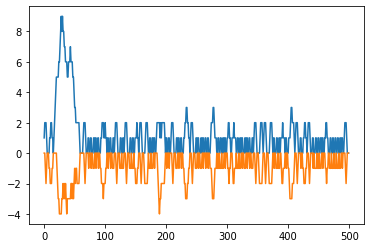

In [157]:
plt.plot(ord_list[:500])
plt.plot(ack_list[:500])
# plt.plot(c_req_list[:500])
# plt.plot(c_ack_list[:200])
# plt.plot(tr_list[:10])